In [1]:
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 4.6 MB/s 
     |████████████████████████████████| 9.8 MB 30.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=9a40a16cd344a922a9e55d726dd1505747f7cb9d520cc385e55d0f98b1dd89c8
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=ba16c6384831fdbcbc6e4b42db462edd7856baa93772763cbf611523baa1427a
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import math
import scipy
import pingouin as pg
import scikit_posthocs as sp

from google.colab import files

from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [18]:
LevodopaChallengeWideClinical = pd.read_csv('LevodopaChallengeWideClinical.csv', sep = ';')


In [19]:
LevodopaChallengeWideClinical

,patient,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,A,2,6,5,5,4,0,4,0,0,...,0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B,1,5,5,5,2,0,3,1,2,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C,1,3,5,3,2,2,3,0,0,...,0,1.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
3,D,2,4,4,2,2,4,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,2,3,3,1,2,4,0,1,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,F,3,4,4,3,4,2,4,2,4,...,1,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
6,G,3,4,4,4,2,2,3,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H,2,4,4,4,2,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,I,1,4,4,3,1,0,0,2,3,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,J,1,3,4,4,1,0,0,0,4,...,3,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0


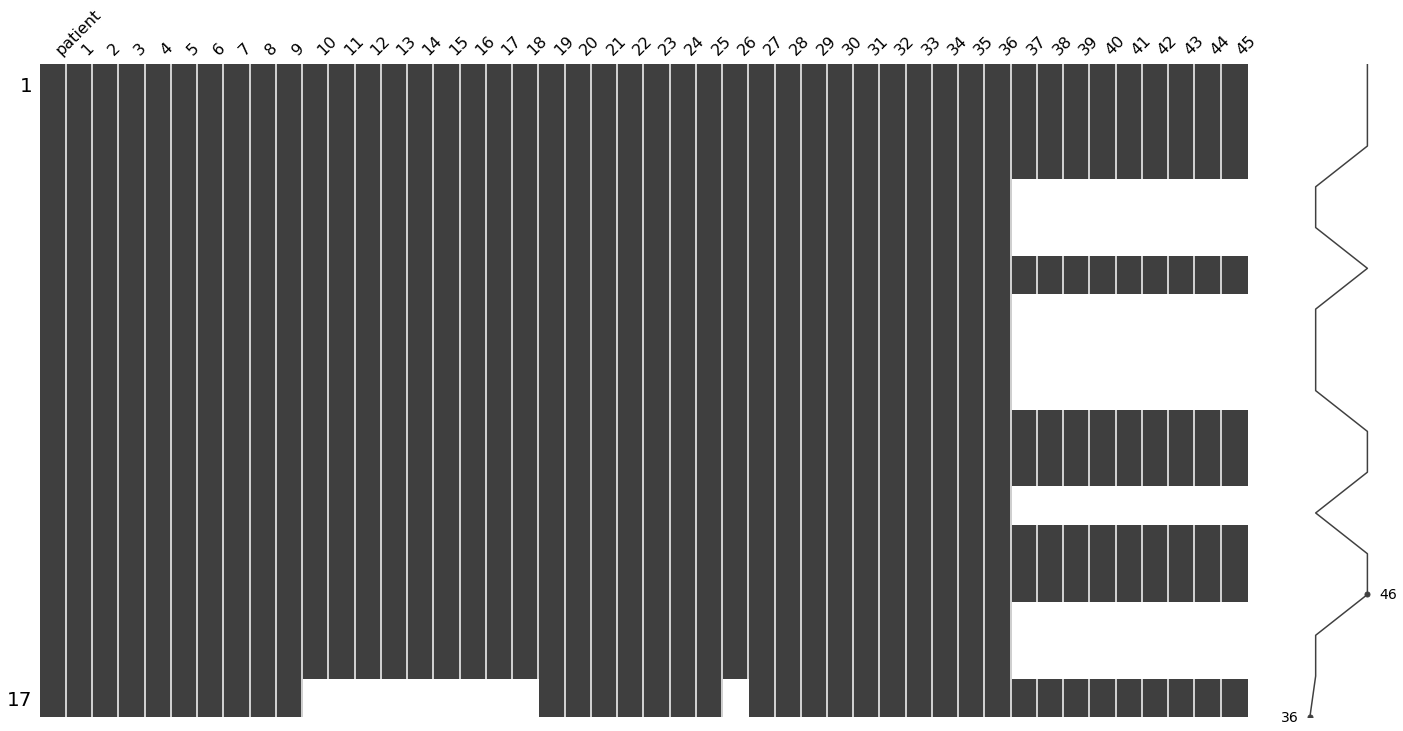

In [20]:
mno.matrix(LevodopaChallengeWideClinical,figsize = (24,12))

In [21]:
# Remove patient index

patid_LevodopaChallengeWideClinical = LevodopaChallengeWideClinical.iloc[:,0:1]

In [22]:
# Select remianing, numeric variables

LevodopaChallengeWideClinical = LevodopaChallengeWideClinical.iloc[:,1:46]

In [23]:
LevodopaChallengeWideClinical

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,2,6,5,5,4,0,4,0,0,2.0,...,0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,5,5,2,0,3,1,2,1.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,5,3,2,2,3,0,0,1.0,...,0,1.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2,4,4,2,2,4,0,0,1,1.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,3,3,1,2,4,0,1,1,1.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,4,4,3,4,2,4,2,4,2.0,...,1,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
6,3,4,4,4,2,2,3,0,0,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,4,4,4,2,0,0,0,0,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,4,4,3,1,0,0,2,3,1.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,3,4,4,1,0,0,0,4,1.0,...,3,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0


In [24]:
missing_columns = list(LevodopaChallengeWideClinical)
missing_columns

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45']

In [25]:
# Input random numbers on the missing spaces

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [26]:
# Rename new variables
for feature in missing_columns:
    LevodopaChallengeWideClinical[feature + '_imp'] = LevodopaChallengeWideClinical[feature]
    LevodopaChallengeWideClinical = random_imputation(LevodopaChallengeWideClinical, feature)

In [27]:
# Estimate the missing data using a regression modl

# Input estimates only (!) on the rows/colunms where the original data was missing (i.e. substitute the random numbers introduced above)

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = LevodopaChallengeWideClinical[feature + "_imp"]
    parameters = list(set(LevodopaChallengeWideClinical.columns) - set(missing_columns) - {feature + '_imp'})
    

    model = linear_model.LinearRegression()
    model.fit(X = LevodopaChallengeWideClinical[parameters], y = LevodopaChallengeWideClinical[feature + '_imp'])
    
    deter_data.loc[LevodopaChallengeWideClinical[feature].isnull(), "Det" + feature] = model.predict(LevodopaChallengeWideClinical[parameters])[LevodopaChallengeWideClinical[feature].isnull()]


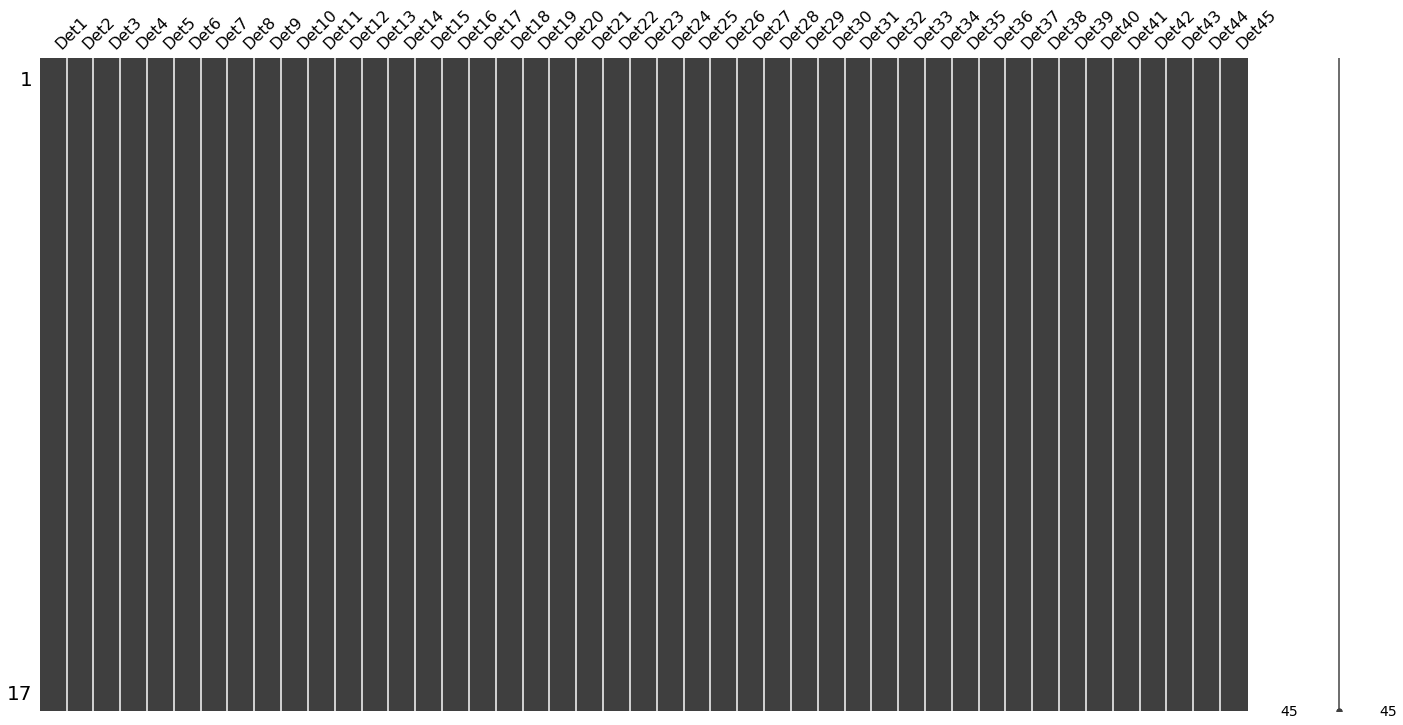

In [28]:
mno.matrix(deter_data, figsize = (24,12))


In [29]:
deter_data.to_csv('output_wide_clinical.csv', encoding = 'utf-8-sig') 
files.download('output_wide_clinical.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
output_wide_clinical = pd.read_csv('output_wide_clinical.csv', sep = ';')

In [32]:
output_wide_clinical

,patient,Item_3.1,Item_3.3,Item_3.4,Item_3.8,Item_3.10,Item_3.11,Item_3.12,Item_3.15,Item_3.17,Short_MDS-UPDRS_III,Axial_Score,Group
0,A,2,6,5,5,4,0,4,0,0,26,10,OFF
1,B,1,5,5,5,2,0,3,1,2,24,6,OFF
2,C,1,3,5,3,2,2,3,0,0,19,8,OFF
3,D,2,4,4,2,2,4,0,0,1,19,8,OFF
4,E,2,3,3,1,2,4,0,1,1,17,8,OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,M,3,0,6,5,2,2,0,0,0,18,7,80min
81,N,1,2,4,4,0,0,3,0,0,14,4,80min
82,O,3,0,4,0,1,0,0,2,0,10,4,80min
83,P,1,4,4,0,1,0,0,0,0,10,2,80min


In [33]:
list(output_wide_clinical)

['patient',
 'Item_3.1',
 'Item_3.3',
 'Item_3.4',
 'Item_3.8',
 'Item_3.10',
 'Item_3.11',
 'Item_3.12',
 'Item_3.15',
 'Item_3.17',
 'Short_MDS-UPDRS_III',
 'Axial_Score',
 'Group']

# MDS-UPDRS III

In [35]:
output_wide_clinical.groupby("Group").describe()["Short_MDS-UPDRS_III"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,18.470588,3.124853,14.0,16.0,18.0,21.0,24.0
40min,17.0,11.411765,5.292197,4.0,8.0,11.0,13.0,22.0
60min,17.0,8.352941,4.513053,0.0,5.0,8.0,11.0,17.0
80min,17.0,8.352941,4.923682,1.0,5.0,8.0,10.0,18.0
OFF,17.0,21.705882,5.709255,15.0,18.0,20.0,24.0,38.0


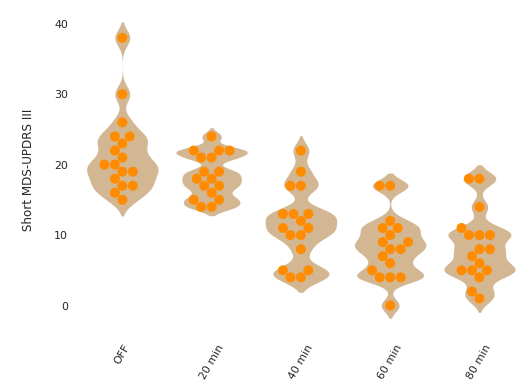

In [56]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Short_MDS-UPDRS_III", data=output_wide_clinical, color="burlywood",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Short_MDS-UPDRS_III", x = "Group", data = output_wide_clinical, color="darkorange", edgecolor = "darkorange", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Short MDS-UPDRS III \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [37]:
pg.friedman(data=output_wide_clinical, dv="Short_MDS-UPDRS_III", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.839037,4,57.054545,1.204998e-11


In [39]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Short_MDS-UPDRS_III", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000e+00,0.286132,0.000254,7.017295e-07,0.000008
20min,2.861318e-01,1.000000,0.007652,1.893347e-05,0.000254
40min,2.541463e-04,0.007652,1.000000,6.905042e-02,0.286132
60min,7.017295e-07,0.000019,0.069050,1.000000e+00,0.417502
80min,8.333659e-06,0.000254,0.286132,4.175023e-01,1.000000


# AXIAL SCORE


In [45]:
output_wide_clinical.groupby("Group").describe()["Axial_Score"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,4.823529,2.242635,2.0,3.0,4.0,7.0,9.0
40min,17.0,3.352941,1.868863,1.0,2.0,3.0,5.0,7.0
60min,17.0,2.235294,1.521899,0.0,1.0,2.0,3.0,6.0
80min,17.0,2.235294,1.855041,0.0,1.0,2.0,4.0,7.0
OFF,17.0,6.882353,3.461978,2.0,5.0,6.0,8.0,14.0


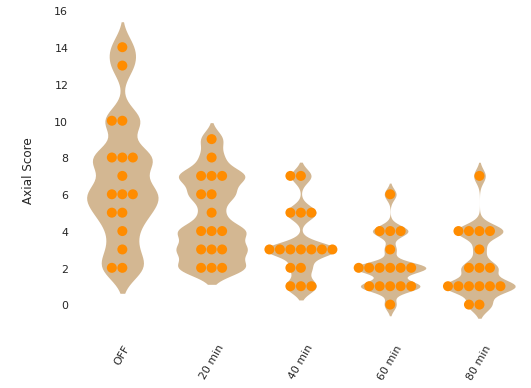

In [55]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Axial_Score", data=output_wide_clinical, color="burlywood",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Axial_Score", x = "Group", data = output_wide_clinical, color="darkorange", edgecolor = "darkorange", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Axial Score \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [47]:
pg.friedman(data=output_wide_clinical, dv="Axial_Score", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.657682,4,44.722408,4.540960e-09


In [48]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Axial_Score", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.213886,0.001212,0.000009,0.000025
20min,0.213886,1.000000,0.042148,0.000445,0.001212
40min,0.001212,0.042148,1.000000,0.115162,0.213886
60min,0.000009,0.000445,0.115162,1.000000,0.648414
80min,0.000025,0.001212,0.213886,0.648414,1.000000
